In [1]:
# system 
import warnings
warnings.filterwarnings('ignore')

# statistic
import numpy as np
import pandas as pd
from scipy import stats 

# plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['font.size'] = 12

# machine learning 
from sklearn import decomposition, cluster

# import the data
data = pd.read_csv('train.csv', engine='c')

## Target value: trip_duration 

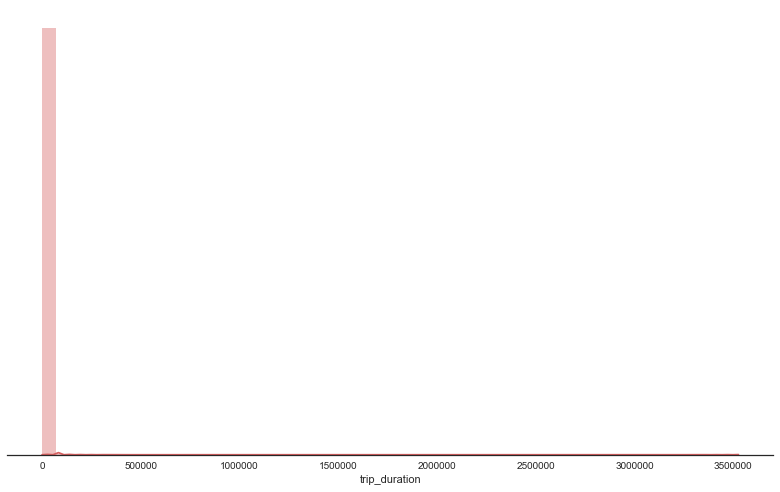

In [2]:
# showing the distribution of target value
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(data['trip_duration'].values, 
             axlabel = 'trip_duration', 
             label = 'trip_duration', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()

the obvious right skewed shows we may have extreme value in the target set. To get a closer look into the target data, first, we have to rule out the extremely numbers

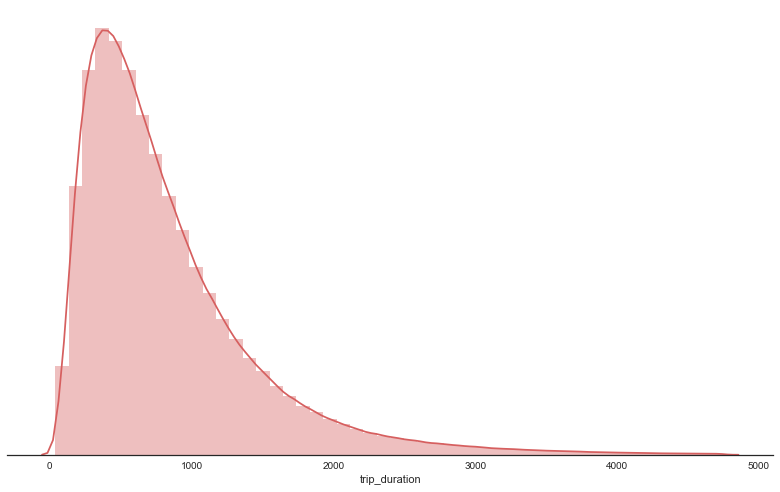

In [3]:
# rule out the extreme number 
durLimits = [np.percentile(data['trip_duration'], 0.4),
             np.percentile(data['trip_duration'], 99.7)]
data = data[(data['trip_duration'] >= durLimits[0] ) &
                (data['trip_duration'] <= durLimits[1])]

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(data['trip_duration'].values, 
             axlabel = 'trip_duration', 
             label = 'trip_duration', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()

## Exploring the features

In [4]:
#### Giographic: logngtitude and lostitude

# rule out the extreme val for visualization
lat_set = np.array(list(data['pickup_latitude']) + list(data['dropoff_latitude']))
lat_limits = [np.percentile(lat_set, 0.3), np.percentile(lat_set, 99.7)]

long_set = np.array(list(data['pickup_longitude']) +
                    list(data['dropoff_longitude']))
long_limits = [np.percentile(long_set, 0.3), np.percentile(long_set, 99.7)]

data = data[(data['pickup_latitude'] >= lat_limits[0] ) & (data['pickup_latitude'] <= lat_limits[1])]
data = data[(data['dropoff_latitude'] >= lat_limits[0] ) & (data['dropoff_latitude'] <= lat_limits[1])]
data = data[(data['pickup_longitude'] >= long_limits[0]) & (data['pickup_longitude'] <= long_limits[1])]
data = data[(data['dropoff_longitude'] >= long_limits[0]) & (data['dropoff_longitude'] <= long_limits[1])]
data = data.reset_index(drop=True)

lat_set = np.array(list(data['pickup_latitude']) + list(data['dropoff_latitude']))
long_set = np.array(list(data['pickup_longitude']) + list(data['dropoff_longitude']))

lat_median  = np.percentile(lat_set,50)
long_median = np.percentile(long_set,50)

lat_km  = 111.32
long_km = np.cos(lat_median*(np.pi/180.0))*111.32

data['dur_min'] = data['trip_duration']/60.0
data['pick_lat_km'] = lat_km * (data.pickup_latitude - lat_median)
data['pick_long_km'] = long_km * (data.pickup_longitude - long_median)
data['drop_lat_km'] = lat_km * (data.dropoff_latitude - lat_median)
data['drop_long_km'] = long_km * (data.dropoff_longitude - long_median)

lat_set  = np.array(list(data['pick_lat_km']) + list(data['drop_lat_km']))
long_set = np.array(list(data['pick_long_km']) + list(data['drop_long_km']))


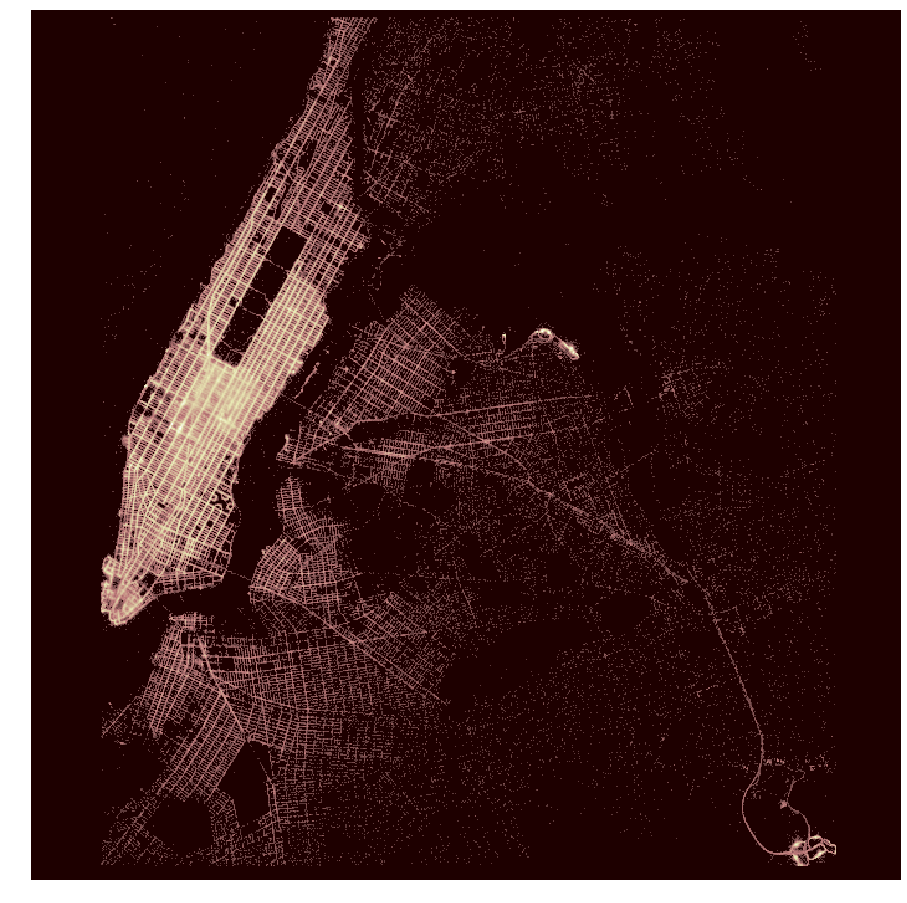

In [5]:
plot_size = (700, 700)
lat_range = [-13, 11]
long_range = [-5, 19]

# standardizing the distance, both longtitude and latitude
lat_st = plot_size[0]-(plot_size[0]*(lat_set-lat_range[0])/(lat_range[1]-lat_range[0])).astype(int)
long_st = (plot_size[1]*(long_set-long_range[0])/(long_range[1] - long_range[0])).astype(int)

# place the standardized lat/ long
geoplot_dataset = np.zeros(plot_size)
for lat, long in zip(lat_st, long_st):
    geoplot_dataset[lat, long] += 1

# plotting 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))
ax.imshow(np.log(geoplot_dataset+1), cmap='pink')
ax.set_axis_off()

highlight spot: manhattan, brooklyn, airport

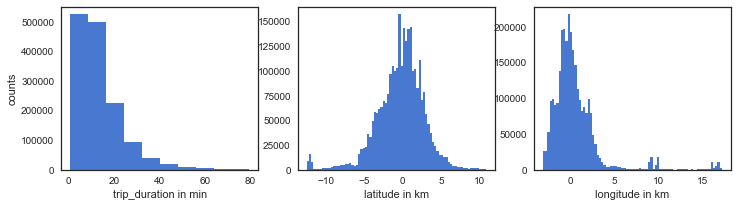

In [6]:
fig , axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
axes[0].hist(data['dur_min'])
axes[0].set_xlabel('trip_duration in min')
axes[0].set_ylabel('counts')

axes[1].hist(lat_set ,80)
axes[1].set_xlabel('latitude in km')

axes[2].hist(long_set,80)
axes[2].set_xlabel('longitude in km')

In [7]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dur_min', 'pick_lat_km', 'pick_long_km',
       'drop_lat_km', 'drop_long_km'],
      dtype='object')

   vendor_id
2     758421
1     660176


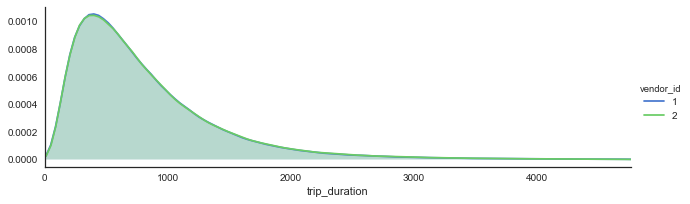

In [8]:
# vendor_id
print(pd.DataFrame(data['vendor_id'].value_counts()))
s = sns.FacetGrid(data, hue='vendor_id', aspect=3)
s.map(sns.kdeplot, 'trip_duration', shade=True)
s.set(xlim=(0, data['trip_duration'].max()))
s.add_legend()

   store_and_fwd_flag
N             1410996
Y                7601


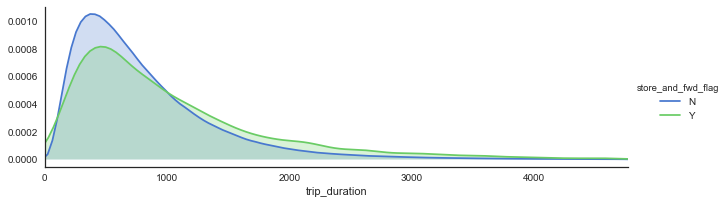

In [9]:
# store_and_fwd_flag
print(pd.DataFrame(data['store_and_fwd_flag'].value_counts()))
s = sns.FacetGrid(data, hue='store_and_fwd_flag', aspect=3)
s.map(sns.kdeplot, 'trip_duration', shade=True)
s.set(xlim=(0, data['trip_duration'].max()))
s.add_legend()

   passenger_count
1          1005453
2           204159
5            76013
3            58230
6            47127
4            27596
0               19


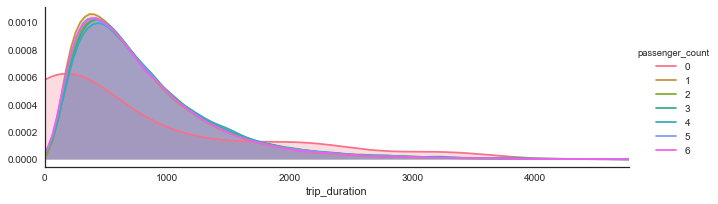

In [10]:
# passenger_count
print(pd.DataFrame(data['passenger_count'].value_counts()))
s = sns.FacetGrid(data, hue='passenger_count', aspect=3)
s.map(sns.kdeplot, 'trip_duration', shade=True)
s.set(xlim=(0, data['trip_duration'].max()))
s.add_legend()